In [10]:
#  Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from matplotlib.colors import ListedColormap

# Set a professional style for plots
sns.set(style="whitegrid")
print("Libraries Imported Successfully!")

Libraries Imported Successfully!


In [11]:
#  Importing the Dataset(dataframe)
df = pd.read_csv('breast_cancer_bd.csv')

# Display first 5 rows to check data
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [12]:
# Data Preprocessing
# Drop the 'Id' column (unique identifier, not a feature)
df = df.drop('Sample code number', axis=1)
#  Replace '?' with NaN and drop missing rows
df = df.replace('?', np.nan)
df = df.dropna()

#  Convert 'Bare Nuclei' column to integer
df['Bare Nuclei'] = df['Bare Nuclei'].astype(int)

#  Separate Features (X) and Target (y)
X = df.iloc[:, :-1].values  # All columns except the last one
y = df.iloc[:, -1].values   # Last column is the target


#  Map Target: 2 (Benign) -> 0, 4 (Malignant) -> 1
y = np.where(y == 2, 0, 1)

print("Data Cleaned and Processed.")
print(f"Features Matrix Shape: {X.shape}")
print(f"Target Vector Shape: {y.shape}")


Data Cleaned and Processed.
Features Matrix Shape: (683, 9)
Target Vector Shape: (683,)


In [13]:
# Splitting the dataset into Training set and Test set
# 'stratify=y' ensures the cancer ratio is consistent in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

print(f"Training Samples: {len(X_train)}")
print(f"Testing Samples: {len(X_test)}")

Training Samples: 546
Testing Samples: 137


In [14]:
#  Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print("Feature Scaling Complete.")

Feature Scaling Complete.


In [15]:
#Training the Logistic Regression model
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

print("Model Trained Successfully.")

Model Trained Successfully.


--- EVALUATION METRICS ---
Accuracy Score: 94.89%

--- CONFUSION MATRIX ---
[[86  3]
 [ 4 44]]

--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        89
           1       0.94      0.92      0.93        48

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.94       137
weighted avg       0.95      0.95      0.95       137



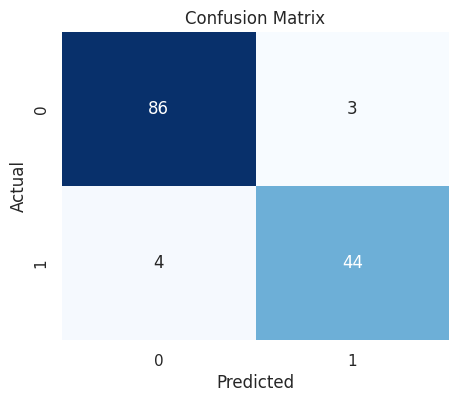

In [16]:
#  Predicting and Evaluating
y_pred = classifier.predict(X_test)

print("--- EVALUATION METRICS ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\n--- CONFUSION MATRIX ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n--- CLASSIFICATION REPORT ---")
print(classification_report(y_test, y_pred))

#  Plot Confusion Matrix Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

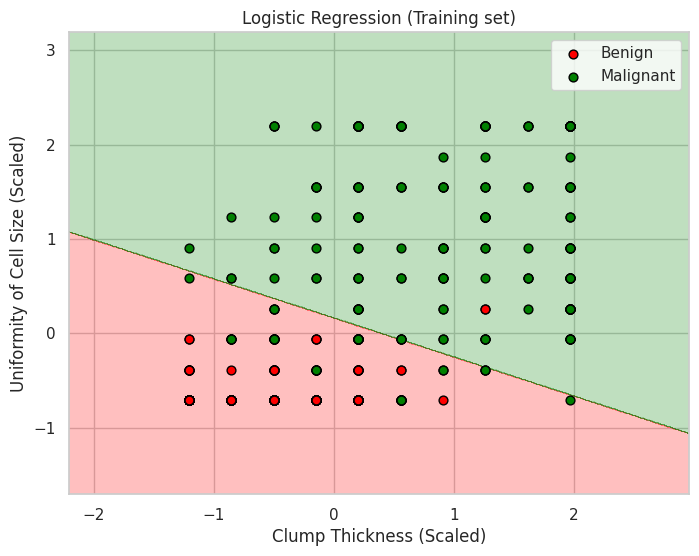

In [ ]:
# Visualising the Training set results(only 2 features for visualization) 
def visualize_boundary(X_set, y_set, title):
    # Select just 2 columns for visualization (Clump Thickness & Cell Size)
    X_vis = X_set[:, [0, 1]] 
    
    # Retrain a simple model on these 2 features for plotting purposes
    clf_vis = LogisticRegression(random_state=0)
    clf_vis.fit(X_vis, y_set)
    
    # Create grid
    X1, X2 = np.meshgrid(np.arange(start=X_vis[:, 0].min() - 1, stop=X_vis[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_vis[:, 1].min() - 1, stop=X_vis[:, 1].max() + 1, step=0.01))
    
    # Plot
    plt.figure(figsize=(8, 6))
    plt.contourf(X1, X2, clf_vis.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.25, cmap=ListedColormap(('red', 'green')))
    
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_vis[y_set == j, 0], X_vis[y_set == j, 1],
                    color=ListedColormap(('red', 'green'))(i), 
                    label=('Benign' if j==0 else 'Malignant'),
                    edgecolors='black', s=40)
    
    plt.title(title)
    plt.xlabel('Clump Thickness (Scaled)')
    plt.ylabel('Uniformity of Cell Size (Scaled)')
    plt.legend()
    plt.show()

# Run visualization for Training Set
visualize_boundary(X_train, y_train, 'Logistic Regression (Training set)')



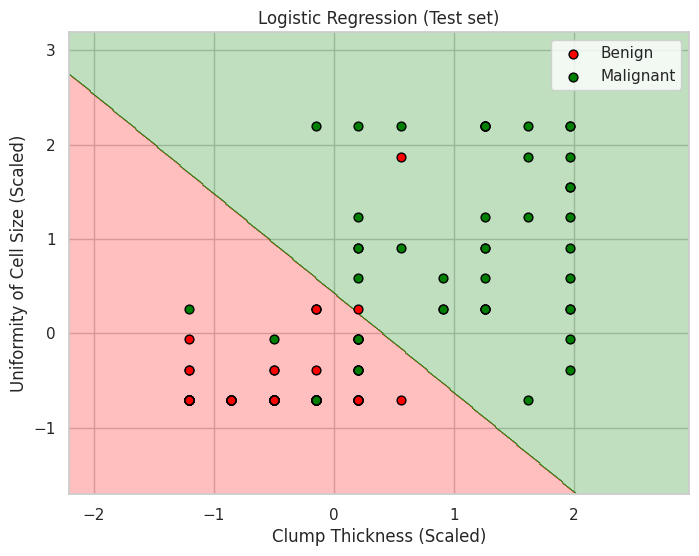

In [18]:
#  Visualising the Test set results
visualize_boundary(X_test, y_test, 'Logistic Regression (Test set)')